In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_diabetes

데이터준비

In [3]:
df = load_diabetes()

In [4]:
df['feature_names']

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [5]:
df['data'][:1]

array([[ 0.03807591,  0.05068012,  0.06169621,  0.02187239, -0.0442235 ,
        -0.03482076, -0.04340085, -0.00259226,  0.01990749, -0.01764613]])

In [6]:
df['target'][:10]

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310.])

데이터 확인결과 회귀모델 사용

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
x = df['data']
y = df['target']

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state= 777)

In [9]:
from sklearn.neighbors import KNeighborsRegressor

In [10]:
scores = []
for k in np.arange(1, 10, 1):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(x_train, y_train)
    scores.append((k, 
                  knn.score(x_train, y_train),
                  knn.score(x_test, y_test)))


In [11]:
# 모델평가 / 해석
scores_df = pd.DataFrame(scores, columns= ['neighbors', 'train_scores', 'test_scores'])
scores_df

,neighbors,train_scores,test_scores
0,1,1.000000,-0.249213
1,2,0.779344,0.102343
2,3,0.681185,0.189588
3,4,0.648336,0.270307
4,5,0.609873,0.257894
5,6,0.583390,0.288529
6,7,0.571900,0.322912
7,8,0.565636,0.325636
8,9,0.559296,0.336516


In [12]:
import matplotlib.pyplot as plt

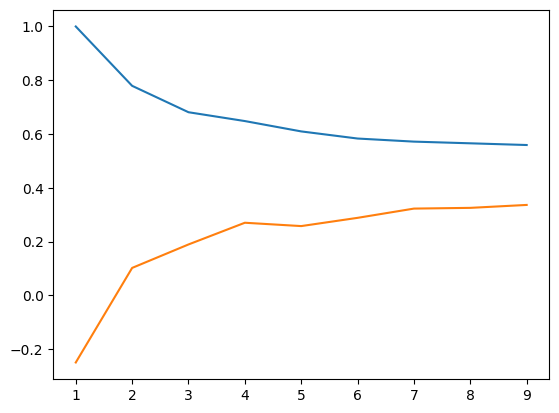

In [13]:
plt.plot(scores_df['neighbors'], scores_df['train_scores'])
plt.plot(scores_df['neighbors'], scores_df['test_scores'])
plt.show()

모델평가 해석 <br>
회귀모델 평가할때는 실제 오차값을 확인해야한다.

In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error

In [15]:
final_knn = KNeighborsRegressor(n_neighbors= 7)
final_knn.fit(x_train,y_train)
train_predicted_y = final_knn.predict(x_train)
test_predicted_y = final_knn.predict(x_test)

mean_absolute_error(y_train,train_predicted_y), \
mean_absolute_error(y_test,test_predicted_y)

(np.float64(39.48467846353042), np.float64(48.37580437580438))

In [16]:
mean_absolute_error(y_train,train_predicted_y) / np.mean(y_train), \
mean_absolute_error(y_test,test_predicted_y) / np.mean(y_test) #절대값

(np.float64(0.2637730800724261), np.float64(0.3034594114560207))

In [17]:
mean_squared_error(y_train, train_predicted_y) #제곱

np.float64(2570.4616807448056)

In [18]:
root_mean_squared_error(y_test, test_predicted_y) #제곱하고 루트씌운거

np.float64(61.78001885653312)